# Our World in Data - Philippine COVID Data 

This is a simple analysis of COVID-19

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

df = pd.read_csv("owid-covid-data.csv", header=None, names=["Date", "New Cases"])

df["Date"] = pd.to_datetime(df["Date"], format='%Y/%m/%d')
df["Total Cases"] = df["New Cases"].cumsum()
df[:7]

,Date,New Cases,Total Cases
0,2020-01-30,1.0,1.0
1,2020-01-31,0.0,1.0
2,2020-02-01,0.0,1.0
3,2020-02-02,1.0,2.0
4,2020-02-03,0.0,2.0
5,2020-02-04,0.0,2.0
6,2020-02-05,0.0,2.0


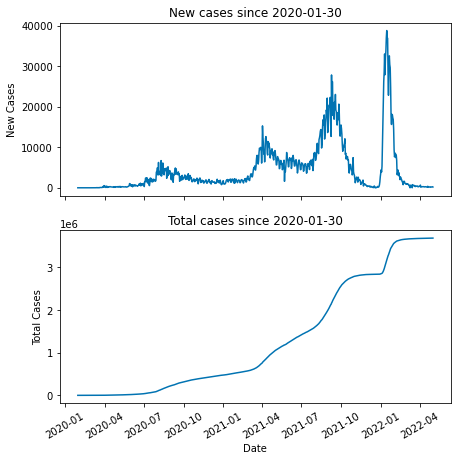

In [28]:
fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(7, 7))

sns.set_palette("colorblind")

sns.lineplot(x="Date", y="New Cases", ax=ax0, data=df)
ax0.set(xlabel="Date", ylabel="New Cases", title="New cases since 2020-01-30")

sns.lineplot(x="Date", y="Total Cases", ax=ax1, data=df)
ax1.set(xlabel="Date", ylabel="Total Cases", title="Total cases since 2020-01-30")

plt.xticks(rotation=30)
plt.show()

In [34]:
df["7DMA"] = df["New Cases"].rolling(window=7, center=True).mean()
df[:7]

,Date,New Cases,Total Cases,7DMA
0,2020-01-30,1.0,1.0,NaN
1,2020-01-31,0.0,1.0,NaN
2,2020-02-01,0.0,1.0,NaN
3,2020-02-02,1.0,2.0,0.285714
4,2020-02-03,0.0,2.0,0.142857
5,2020-02-04,0.0,2.0,0.285714
6,2020-02-05,0.0,2.0,0.285714


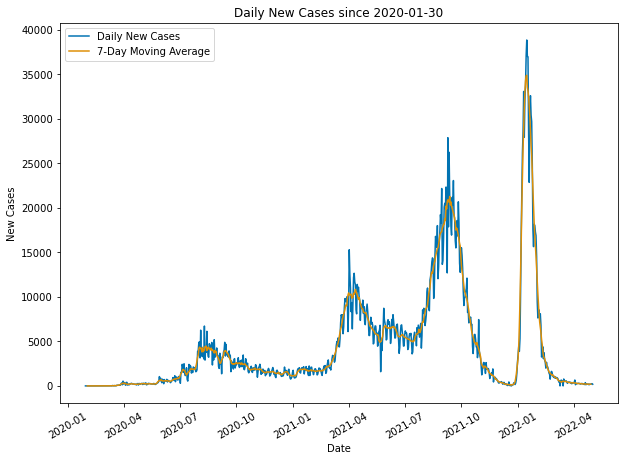

In [41]:
fig, ax = plt.subplots(figsize=(10,7))

sns.lineplot(x="Date", y="value", hue="variable", ax=ax,
             data=pd.melt(df[["Date", "New Cases", "7DMA"]], ['Date']))
ax.set(xlabel="Date", ylabel="New Cases", title="Daily New Cases since 2020-01-30")

plt.legend(labels=["Daily New Cases", "7-Day Moving Average"])
plt.xticks(rotation=30)
plt.show()